## Major Assignment – 2 (Chapter 3 – 4)
### Part B – Lab Questions

Q1. An automobile company wants to predict a car’s mpg value from its physical attributes.  
Tasks:  
(a) Load the dataset auto_mpg.csv and remove missing values.  
(b) Identify predictor and target variables.  
(c) Perform data splitting (80% train, 20% test).  
(d) Fit a Linear Regression model and predict test outcomes.  
(e) Evaluate the model using Mean Squared Error and R² score.  
(f) Discuss: If the R² score = 0.85, what does it imply about model performance?  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# (a) Load dataset and remove missing values
df = pd.read_csv("auto_mpg.csv")
df = df.dropna()

# (b) Predictor and target variables
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']

# (c) Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (d) Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict test outcomes
y_pred = model.predict(X_test)

# (e) Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 17.93917197663127
R²: 0.6485312110889081


Q2. Exploring random sampling methods to estimate model uncertainty.  
Tasks:  
(a) From the btissue.csv data, extract only the feature columns (excluding labels).  
(b) Using the resample() method, create a bootstrap sample of 100 observations.  
(c) Show the first 10 rows of the sample and identify if any rows are repeated.  

In [3]:
import pandas as pd
from sklearn.utils import resample

# (a) Load data and extract feature columns (remove label column)
df = pd.read_csv("btissue.csv")
X = df.drop('class', axis=1)

# (b) Create a bootstrap sample of 100 observations
boot_sample = resample(X, n_samples=100, replace=True, random_state=42)

# (c) Show first 10 rows and check repeated rows
print(boot_sample.head(10))

# Identify repeated rows
duplicates = boot_sample[boot_sample.duplicated()]
print("Repeated rows:")
print(duplicates)


              I0     PA500       HFS           DA           Area        A/DA  \
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
51    274.993396  0.147131  0.137532    66.457943    1217.415651   18.318588   
92   1800.000000  0.091979  0.205251   362.863321   15021.553890   41.397278   
14    485.668806  0.230209  0.134041   253.893699    8135.968359   32.044783   
71   1385.664721  0.092328  0.089361   202.480044    8785.028733   43.387134   
60    197.000000  0.132645  0.074002    33.460653     409.647141   12.242652   
20    500.000000  0.192684  0.194779   144.688578    3055.012963   21.114403   
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
82   1647.939811  0.080983  0.086568   576.770376   11852.485060   20.549747   
86   2100.000000  0.121649  0.377689   450.551667   35671.606290   79.173176   

         Max IP          DR            P  
102  418.687286  977.552367  2664.583623  
51    40.849678   52.421008   327

Q3. Instead of relying on a single train–test split, you want to check how consistent your model is.  
Tasks:  
(a) Using the btissue.csv dataset, implement 5-fold cross-validation.  
(b) For each fold, print the train/test indices and record how many samples are used for training vs testing.  
(c) Visualize or summarize how different folds cover the entire dataset without overlap

In [4]:
import pandas as pd
from sklearn.model_selection import KFold

# (a) Load dataset
df = pd.read_csv("btissue.csv")

# Assume last column is the label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_num = 1
all_train_sizes = []
all_test_sizes = []

# (b) Print train/test indices and sample counts
for train_index, test_index in kf.split(X):
    print(f"Fold {fold_num}")
    print("Train indices:", train_index)
    print("Test indices :", test_index)
    print("Train size:", len(train_index))
    print("Test size :", len(test_index))
    print("-" * 40)

    all_train_sizes.append(len(train_index))
    all_test_sizes.append(len(test_index))
    
    fold_num += 1

# (c) Summary of coverage across folds
print("Train sizes for each fold:", all_train_sizes)
print("Test sizes for each fold:", all_test_sizes)
print("\nEach data point appears in exactly one test fold, ensuring full non-overlapping coverage.")


Fold 1
Train indices: [  1   2   3   5   6   7   8   9  13  14  15  16  17  19  20  21  22  23
  24  25  26  27  28  29  31  32  34  35  36  37  38  39  40  41  43  45
  46  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  66  68
  69  70  71  72  73  74  75  76  77  82  83  84  85  86  87  88  89  90
  91  92  94  95  96  98  99 101 102 103 104 105]
Test indices : [  0   4  10  11  12  18  30  33  42  44  47  55  64  65  67  78  79  80
  81  93  97 100]
Train size: 84
Test size : 22
----------------------------------------
Fold 2
Train indices: [  0   1   2   3   4   6   7   8  10  11  12  13  14  17  18  19  20  21
  23  24  25  27  29  30  32  33  34  37  38  41  42  43  44  46  47  48
  49  50  51  52  54  55  56  57  58  59  60  61  63  64  65  66  67  68
  69  70  71  72  74  75  78  79  80  81  82  83  84  85  86  87  89  90
  91  92  93  94  96  97  98  99 100 101 102 103 105]
Test indices : [  5   9  15  16  22  26  28  31  35  36  39  40  45  53  62  73  76  77
  8

Q4. Testing two validation techniques to measure model generalization.  
Tasks:  
(a) Use the btissue.csv dataset and a Decision Tree Classifier.  
(b) Evaluate model performance using:  
i) Holdout (80/20 split)  
ii) 5-Fold Cross-Validation  
(c) Compare the accuracy results from both methods.  

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# (a) Load dataset
df = pd.read_csv("btissue.csv")

# Assume last column is the label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# (b.i) Holdout Validation (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_holdout = DecisionTreeClassifier(random_state=42)
model_holdout.fit(X_train, y_train)
y_pred = model_holdout.predict(X_test)

holdout_accuracy = accuracy_score(y_test, y_pred)
print("Holdout Accuracy:", holdout_accuracy)

# (b.ii) 5-Fold Cross-Validation
model_cv = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(model_cv, X, y, cv=5)

print("Cross-Validation Accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# (c) Comparison
print("\nComparison:")
print("Holdout Accuracy:", holdout_accuracy)
print("Mean CV Accuracy:", cv_scores.mean())


Holdout Accuracy: 0.7272727272727273
Cross-Validation Accuracies: [0.63636364 0.66666667 0.66666667 0.61904762 0.52380952]
Mean CV Accuracy: 0.6225108225108225

Comparison:
Holdout Accuracy: 0.7272727272727273
Mean CV Accuracy: 0.6225108225108225


<b>Q5.</b> Feature Creation from Structured Data  
(a) Using a dataset containing columns like Age, Income, and Spending Score, construct  
new derived features such as Age Group, Income-to-Spending Ratio, and Normalized Spending.  
(b) Plot and analyze how the new features correlate with the target variable.  


Dataset with Created Features:
   Age  Income  SpendingScore  Target AgeGroup  Income_Spend_Ratio  \
0   23   25000             60       1    Young          416.666667   
1   35   45000             40       0    Adult         1125.000000   
2   52   52000             30       0   Middle         1733.333333   
3   28   30000             75       1    Adult          400.000000   
4   46   60000             50       1   Middle         1200.000000   

   Normalized_Spending  AgeGroup_num  
0             0.677419             0  
1             0.354839             1  
2             0.193548             2  
3             0.919355             1  
4             0.516129             2  

Correlation Matrix:
                     AgeGroup_num  Income_Spend_Ratio  Normalized_Spending  \
AgeGroup_num             1.000000            0.783650            -0.815179   
Income_Spend_Ratio       0.783650            1.000000            -0.915656   
Normalized_Spending     -0.815179           -0.915656     

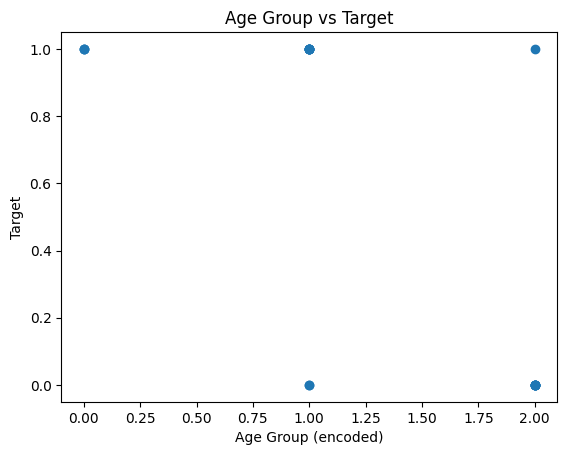

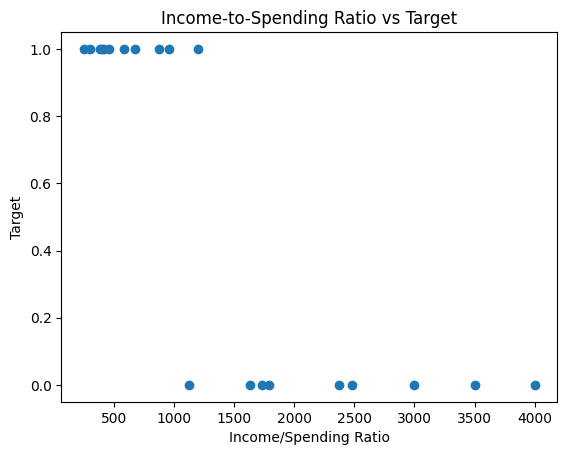

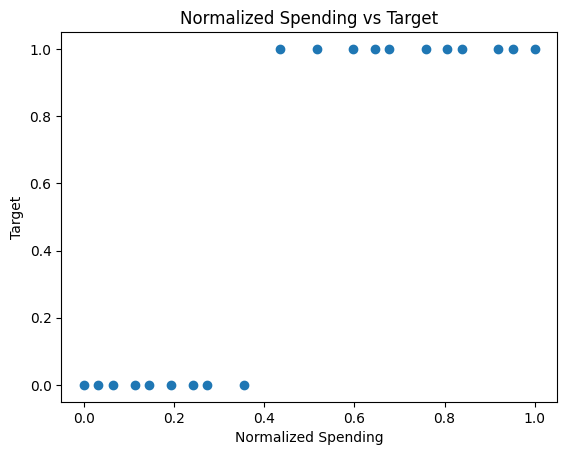

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

# Feature Engineering

# Age Group categorization
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 25, 45, 65, 100],
                        labels=['Young', 'Adult', 'Middle', 'Senior'])

# Income-to-Spending ratio
df['Income_Spend_Ratio'] = df['Income'] / df['SpendingScore']

# Normalized Spending Score
scaler = MinMaxScaler()
df['Normalized_Spending'] = scaler.fit_transform(df[['SpendingScore']])

# Convert AgeGroup to numeric code
df['AgeGroup_num'] = df['AgeGroup'].cat.codes

print("\nDataset with Created Features:")
print(df.head())

# Correlation Analysis
print("\nCorrelation Matrix:")
corr_matrix = df[['AgeGroup_num', 'Income_Spend_Ratio', 'Normalized_Spending', 'Target']].corr()
print(corr_matrix)

# Visualization

# Scatter plot 1:AgeGroup vs Target
plt.scatter(df['AgeGroup_num'], df['Target'])
plt.xlabel("Age Group (encoded)")
plt.ylabel("Target")
plt.title("Age Group vs Target")
plt.show()

# Scatter plot 2: Income-to-Spending Ratio vs Target
plt.scatter(df['Income_Spend_Ratio'], df['Target'])
plt.xlabel("Income/Spending Ratio")
plt.ylabel("Target")
plt.title("Income-to-Spending Ratio vs Target")
plt.show()

# Scatter plot 3: Normalized Spending vs Target
plt.scatter(df['Normalized_Spending'], df['Target'])
plt.xlabel("Normalized Spending")
plt.ylabel("Target")
plt.title("Normalized Spending vs Target")
plt.show()


<b>Q6.</b> Load the Iris dataset and select a subset of features manually using the .iloc function.  
Train a simple Decision Tree Classifier using only the selected subset of features and  
compare its performance with the model trained using all features.  
Tasks:  
(a) Load the Iris dataset from sklearn.datasets.  
(b) Create a DataFrame and display the first few rows.  
(c) Train a Decision Tree Classifier using all features and record the accuracy.  
(d) Select a subset of columns (for example, the first two features: sepal length and sepal width) using .iloc.  
(e) Train another model using only the selected features and evaluate its accuracy.  
(f) Compare and discuss the results of both models.  

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# (a) Load Iris dataset
iris = load_iris()

# (b) Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())

# (c) Train model using ALL features
X_all = df.iloc[:, :-1]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

model_all = DecisionTreeClassifier(random_state=42)
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy using all features:", accuracy_all)

# (d) Select subset of features (first two columns)
X_subset = df.iloc[:, :2]

# (e) Train model using subset
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_subset, y, test_size=0.2, random_state=42
)

model_subset = DecisionTreeClassifier(random_state=42)
model_subset.fit(X_train_s, y_train_s)
y_pred_subset = model_subset.predict(X_test_s)

accuracy_subset = accuracy_score(y_test_s, y_pred_subset)
print("Accuracy using subset features:", accuracy_subset)

# (f) Comparison
print("\nComparison:")
print("All features accuracy   :", accuracy_all)
print("Subset features accuracy:", accuracy_subset)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy using all features: 1.0
Accuracy using subset features: 0.6333333333333333

Comparison:
All features accuracy   : 1.0
Subset features accuracy: 0.6333333333333333


<b>Q7.</b> Load the Iris dataset and apply Principal Component Analysis (PCA) to reduce its four  
numerical features (sepal length, sepal width, petal length, petal width) into two principal  
components. Visualize the transformed data in a 2D scatter plot to observe how the classes  
(Setosa, Versicolor, Virginica) are separated in the reduced feature space. Additionally,  
display the explained variance ratio for each component.  
Tasks:  
(a) Load the Iris dataset using sklearn.datasets.  
(b) Perform PCA to reduce the dataset to two components.  
(c) Create a new DataFrame containing the two principal components and target labels.  
(d) Plot the two components using a scatter plot with different colors for each class.  

Explained variance ratio: [0.92461872 0.05306648]
        PC1       PC2  target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0


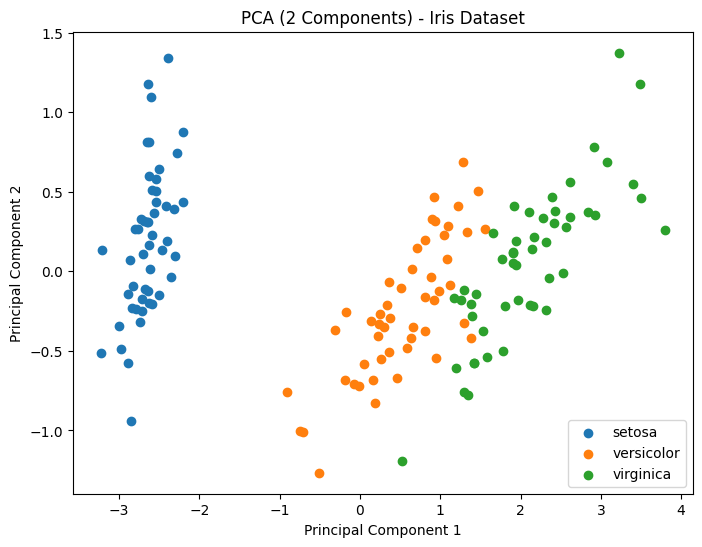

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# (a) Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# (b) PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# (c) New DataFrame with components + labels
df_pca = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "target": y
})
print(df_pca.head())

# (d) 2D scatter plot
plt.figure(figsize=(8,6))

for class_value, class_name in enumerate(iris.target_names):
    plt.scatter(
        df_pca[df_pca.target == class_value]["PC1"],
        df_pca[df_pca.target == class_value]["PC2"],
        label=class_name
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2 Components) - Iris Dataset")
plt.legend()
plt.show()


<b>Q8.</b> Create a dataset containing employee information, including Department, Job Role, and  
Marital Status. Convert all categorical columns into numeric form so that the dataset can be  
used effectively for training machine learning models. Use appropriate encoding techniques  
such as Label Encoding and One-Hot Encoding.  
Tasks:  
(a) Create a DataFrame with the following columns and sample data:  
Department (e.g., HR, IT, Finance)  
Job_Role (e.g., Manager, Analyst, Clerk)  
Marital_Status (e.g., Single, Married, Divorced)  
(b) Display the original dataset.  
(c) Encode categorical columns using:  
Label Encoding for ordered or binary categories.  
One-Hot Encoding for nominal categories  

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# (a) Create sample DataFrame
data = {
    "Department": ["HR", "IT", "Finance", "IT", "HR"],
    "Job_Role": ["Manager", "Analyst", "Clerk", "Manager", "Clerk"],
    "Marital_Status": ["Single", "Married", "Divorced", "Married", "Single"]
}

df = pd.DataFrame(data)

# (b) Display original dataset
print("Original Dataset:")
print(df)

# (c) Encoding

# Label Encoding for Marital_Status (can be considered ordered/binary-like)
le = LabelEncoder()
df["Marital_Status_Encoded"] = le.fit_transform(df["Marital_Status"])

# One-Hot Encoding for nominal columns
df_encoded = pd.get_dummies(df, columns=["Department", "Job_Role"])

print("\nEncoded Dataset:")
print(df_encoded)


Original Dataset:
  Department Job_Role Marital_Status
0         HR  Manager         Single
1         IT  Analyst        Married
2    Finance    Clerk       Divorced
3         IT  Manager        Married
4         HR    Clerk         Single

Encoded Dataset:
  Marital_Status  Marital_Status_Encoded  Department_Finance  Department_HR  \
0         Single                       2               False           True   
1        Married                       1               False          False   
2       Divorced                       0                True          False   
3        Married                       1               False          False   
4         Single                       2               False           True   

   Department_IT  Job_Role_Analyst  Job_Role_Clerk  Job_Role_Manager  
0          False             False           False              True  
1           True              True           False             False  
2          False             False            True    